In [11]:
import numpy as np

# make a 2D array of shape (m, n) with random values

random_positions = np.random.rand(5, 5)

coords = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9]])

In [ ]:
configs ={
        "sam2":{
            "checkpoint": "/home/admina/segmetation/DLOSeg/src/segment_anything_2_real_time/checkpoints/sam2.1_hiera_small.pt",
            "config": "/home/admina/segmetation/DLOSeg/src/configs/sam2.1/sam2.1_hiera_s.yaml"
        },
        "grounding_dino":{
            "checkpoint":"src/Grounded_SAM_2/grounding_dino/groundingdino/config/GroundingDINO_SwinT_OGC.py",
            "config":"src/Grounded_SAM_2/gdino_checkpoints/groundingdino_swint_ogc.pth"

    }
    }

In [7]:
configs["sam2"].items()

dict_items([('checkpoint', '/home/admina/segmetation/DLOSeg/src/segment_anything_2_real_time/checkpoints/sam2.1_hiera_small.pt'), ('config', '/home/admina/segmetation/DLOSeg/src/configs/sam2.1/sam2.1_hiera_s.yaml')])

In [81]:
len(dc)

0

In [79]:
min(dc, key=lambda x: dc[x][1])


3

In [ ]:
import numpy as np
import torch
node_420 = {'pos': (0, 0), 'bending_energy': 4.200407028198242}
node_425 = {'pos': (1, 0), 'bending_energy': 0.08311790972948074}
node_358 = {'pos': (0, 1), 'bending_energy': 9.93548583984375}
np_420 = np.array([node_420['pos'][0], node_420['pos'][1]])
np_425 = np.array([node_425['pos'][0], node_425['pos'][1]])
np_358 = np.array([node_358['pos'][0], node_358['pos'][1]])

prev_edges =  np_420 - np_425
next_edges =  np_420 - np_358

In [58]:
import torch
import torch.nn.functional as F
node_420 = {'pos': (0, 0)}
node_425 = {'pos': (0, 1)}
node_358 = {'pos': (-1, -1)}
np_420 = np.array([node_420['pos'][0], node_420['pos'][1]])
np_425 = np.array([node_425['pos'][0], node_425['pos'][1]])
np_358 = np.array([node_358['pos'][0], node_358['pos'][1]])

prev_edges =  np_420 - np_425
next_edges =  np_358 - np_420
# make sure the edges are 2D vectors
if prev_edges.ndim == 1:
    prev_edges = prev_edges.reshape(1, -1)
if next_edges.ndim == 1:
    next_edges = next_edges.reshape(1, -1)
# points: (N,2) tensor (requires_grad=True if torch)
e_prev = torch.from_numpy(prev_edges).float()  # (N,2)
e_next = torch.from_numpy(next_edges).float()  # (N,2)
# N×2 → N×3   (append a zero z–component)
e_prev3 = F.pad(e_prev, (0, 1))        # (1,3)
e_next3 = F.pad(e_next, (0, 1))        # (1,3)

cross   = torch.cross(e_prev3, e_next3, dim=1)   # (1,3)
dot     = (e_prev3 * e_next3).sum(dim=1)         # (1,)

L_prev  = torch.linalg.norm(e_prev3, dim=1)
L_next  = torch.linalg.norm(e_next3, dim=1)

denom   = (L_prev * L_next + dot).clamp_min(1e-12)
kappa_b = 2.0 * cross / denom.unsqueeze(1)       # (1,3)

kappa2  = (kappa_b**2).sum(dim=1)                # (1,)
l_i     = 0.5 * (L_prev + L_next)                # (1,)
E_i     = kappa2 * l_i                           # (1,)

print("kappa_b:", kappa_b)
print("E_i:", E_i)

kappa_b: tensor([[ 0.0000, -0.0000, -0.8284]])
E_i: tensor([0.8284])


In [38]:
print(e_prev)
print(e_next)
print(e_prev @ e_next.T)
print((e_prev * e_next).sum(dim=1))


tensor([[-10.,   0.]])
tensor([[  0., -10.]])
tensor([[0.]])
tensor([0.])


In [35]:
L_prev * L_next + e_prev.dot(e_next) + 1e-12

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [ ]:
kb_i = 2 *  e_prev.cross(e_next) / (L_prev * L_next + e_prev.dot(e_next) + 1e-12)  # κᵢ
# Bending energy
1.0 * torch.sum(kb_i**2 / li)

1
2
3


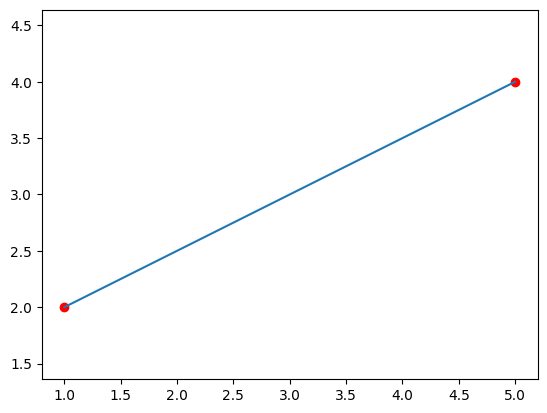

In [9]:
def line_points(p1, p2, num=10):
    x1, y1 = p1
    x2, y2 = p2
    t = np.linspace(0, 1, num)
    x = (1 - t) * x1 + t * x2
    y = (1 - t) * y1 + t * y2
    return x, y

import matplotlib.pyplot as plt
x, y = line_points((1, 2), (5, 4))
plt.plot(x, y)
plt.scatter(*zip((1, 2), (5, 4)), color='red')  # endpoints
plt.axis('equal')
plt.show()

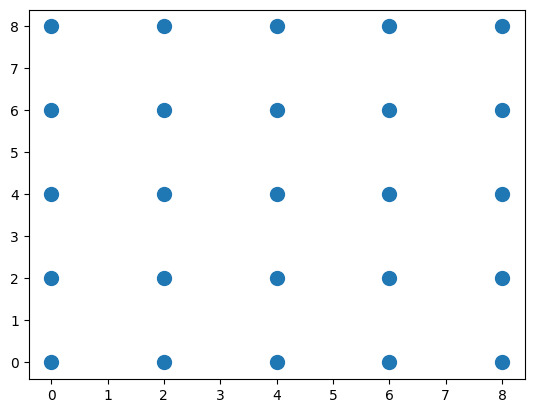

In [3]:
import matplotlib.pyplot as plt
width = 10
hight = 10
grid_size = 2
xs = []
ys = []
for x in range(0, width, grid_size):
    for y in range(0, hight, grid_size):
        xs.append(x)
        ys.append(y)
        

plt.scatter(xs, ys, s=100)

In [236]:
import numpy as np

graph = np.array(  [[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
                    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])




In [14]:
import numpy as np
pos = np.array([[0, 0],
                [0, 1],
                [0, 2],
                [0, 3],
                [0, 4],
                [0, 5],
                [0, 6],
                [0, 7],
                [0, 8],
                [0, 9],
                [0, 10],
                [0, 11],
                [0, 12],
                [0, 13],
                [0, 14]])

cluster = [0, 1, 2, 3, 4]

In [27]:
import math

math.degrees(math.atan2(0,-3)) 


180.0

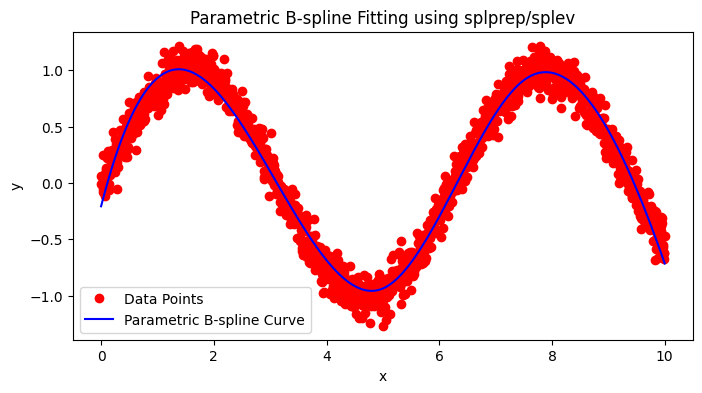

In [39]:
import numpy as np
from scipy.interpolate import splrep, splev
import matplotlib.pyplot as plt
# Assuming x and y are derived from your data
x = np.linspace(0, 10, 1500)  # Example x values
y = np.sin(x) + np.random.normal(size=x.size)*0.1  # Example y values with noise

# Sort the arrays based on x
sorted_indices = np.argsort(x)
x = x[sorted_indices]
y = y[sorted_indices]

# Now compute the spline
tck = splrep(x, y, s=20)

# Define a dense set of x values for evaluation
x_fine = np.linspace(x.min(), x.max(), 1000)
y_fine = splev(x_fine, tck)

plt.figure(figsize=(8, 4))
# plt.plot(points[:, 0], points[:, 1], 'ro', label='Data Points')
plt.plot(x, y, 'ro', label='Data Points')
plt.plot(x_fine, y_fine, 'b-', label='Parametric B-spline Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Parametric B-spline Fitting using splprep/splev')
plt.show()


start []
end []
